In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from scipy.signal import stft
import matplotlib.pyplot as plt
from neurodsp.utils import create_times

# 샘플 데이터 생성
fpath = "../../data/DNN_data/v3/"

x_data = np.load(fpath + "data_with_non_sine_v2_varying" + ".npy")
y_data = np.load(fpath + "data_signal" + ".npy")

# Set some general settings, to be used across all simulations
fs = 2000
num_signals = 1000

# Simulation settings
n_seconds = 2
times = create_times(n_seconds, fs)

fft_win_time = 1  # 윈도우 길이 (초)
n_fft = fft_win_time * fs  # FFT 윈도우 크기, 2000 샘플
fft_overlap_time = fft_win_time / 2 * fs  # 오버랩 크기, 1000 샘플, 50%


In [2]:
def compute_power_spectrum(data, fs, n_fft, overlap):
    power_spectra = []
    for sample in data:
        f, t, Zxx = stft(sample, fs=fs, nperseg=n_fft, noverlap=overlap)
        power_spectrum = np.abs(Zxx) ** 2  # 파워 스펙트럼 계산
        power_spectra.append(power_spectrum)
    return np.array(power_spectra)

x_power_spectra = compute_power_spectrum(x_data, fs, n_fft, fft_overlap_time)
y_power_spectra = compute_power_spectrum(y_data, fs, n_fft, fft_overlap_time)

print(f"x_power_spectra shape: {x_power_spectra.shape}")
print(f"y_power_spectra shape: {y_power_spectra.shape}")

x_power_spectra shape: (1000, 1001, 5)
y_power_spectra shape: (1000, 1001, 5)


In [3]:
x_power_spectra = torch.tensor(x_power_spectra, dtype=torch.float32)
y_power_spectra = torch.tensor(y_power_spectra, dtype=torch.float32)

# 데이터에 채널 차원 추가 (N, C, H, W 형식)
x_power_spectra = x_power_spectra.unsqueeze(1)
y_power_spectra = y_power_spectra.unsqueeze(1)

print(f"x_power_spectra tensor shape: {x_power_spectra.shape}")
print(f"y_power_spectra tensor shape: {y_power_spectra.shape}")

x_power_spectra tensor shape: torch.Size([1000, 1, 1001, 5])
y_power_spectra tensor shape: torch.Size([1000, 1, 1001, 5])


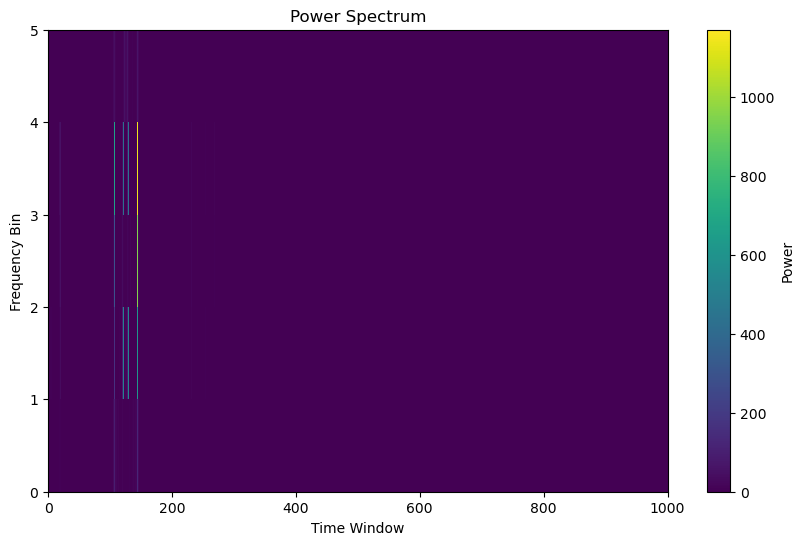

In [4]:
# 결과 확인
# 특정 채널과 특정 윈도우의 파워 스펙트럼 계산 (예시로 첫 번째 윈도우와 첫 번째 채널)
power_spectrum = np.abs(x_power_spectra[0, 0, :]) ** 2

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.pcolormesh(power_spectrum.T)
plt.colorbar(label='Power')
plt.xlabel('Time Window')
plt.ylabel('Frequency Bin')
plt.title('Power Spectrum')
plt.show()

In [5]:
# class SimpleCNN(nn.Module):
#     def __init__(self):
#         super(SimpleCNN, self).__init__()
#         self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
#         self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
#         self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        
#         # 임의의 입력으로 텐서 크기 계산
#         dummy_input = torch.zeros(1, 1, n_fft//2 + 1, x_power_spectra.size(-1))
#         dummy_output = self._forward_conv(dummy_input)
#         self.flattened_size = dummy_output.numel()
        
#         self.fc1 = nn.Linear(self.flattened_size, 128)
#         self.fc2 = nn.Linear(128, 2)  # 2개의 클래스 (x, y)

#     def _forward_conv(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         return x

#     def forward(self, x):
#         x = self._forward_conv(x)
#         x = x.view(x.size(0), -1)
#         x = F.relu(self.fc1(x))
#         x = self.fc2(x)
#         return x

# model = SimpleCNN()
# print(model)


In [6]:
# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [7]:
# # 예제 레이블 생성
# labels = torch.cat((torch.zeros(1000, dtype=torch.long), torch.ones(1000, dtype=torch.long)))

# # 데이터 합치기
# data = torch.cat((x_power_spectra, y_power_spectra))
# dataset = torch.utils.data.TensorDataset(data, labels)
# dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

# # 훈련 루프
# num_epochs = 10
# for epoch in range(num_epochs):
#     running_loss = 0.0
#     for inputs, labels in dataloader:
#         optimizer.zero_grad()
#         outputs = model(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()
#         running_loss += loss.item()
    
#     print(f"Epoch {epoch + 1}, Loss: {running_loss / len(dataloader)}")

# print("Training completed")